# Treti lekce:

## Znovu projet celou lekci a nize udelat domacak, coz bude to samy, akorat na novym datasetu:

#### nacist balicky:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Set maximum number of rows and columns to display
pd.set_option('display.max_rows', 30)  # None means display all rows
pd.set_option('display.max_columns', 40)  # None means display all columns

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
FIG_SIZE = (10,8) #manipulate figsize globally

In [5]:
df = pd.read_csv("./data/3_lekce_houses_train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,...,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,...,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,...,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,...,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,...,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,...,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,...,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,...,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,...,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 1. Identifikace chybějících hodnot --> df.isna().sum()
**Zadání:**
Napište funkci, která najde chybějící hodnoty v datasetu a vypíše, kolik chybějících hodnot je v každém sloupci.

#### **reseni:**

In [6]:
def null_columns(dataframe : pd.core.frame.DataFrame, relative=False):
    """Eats a dataframe and spits out a dataframe with the nullcount for each column.
    the column with the nullcounts is named 'null_counts'
    the column with the names of columns from the original datafrate is named 'col_names'
    When relative=True is set then it will return the relative nullcount instead
    """
    
    #get rowcount of original DF:
    length = len(dataframe)
    #get nullcounts per column and turn it into a DF and then rename its columns
    counts_DF = dataframe.isna().sum().reset_index().rename(columns={0:"null_counts", "index":"col_names"})
    
    #return rel or abs values
    if relative == False:
        return counts_DF
    else:
        counts_DF["null_counts"] /= length
        return counts_DF

In [7]:
null_overview = null_columns(df, relative=True)
null_overview;

#### nastavba na reseni:

In [8]:
def null_columns_only_null(dataframe : pd.core.frame.DataFrame, relative=False):
    """Eats a dataframe and spits out a dataframe with only the columns
    that contain null values. Each column_name with the nullcount for each column
    the column with the nullcounts is named 'null_counts'
    the column with the names of columns from the original datafrate is named 'col_names'"""
    null_columns_DF = null_columns(dataframe, relative=relative)
    return null_columns_DF[null_columns_DF["null_counts"]>0]
    

In [9]:
null_columns_only_null(df, relative=True);

#### kombinace obojiho predchoziho:

In [10]:
def null_count(dataframe : pd.core.frame.DataFrame, only_null=False, relative=False):
    """Eats a DF and spits out a DF with column names from the original df as rows.
    Each column name with the nullcount for said column.
    The column with the nullcounts is named 'null_counts' in the output DF.
    The column with the names of columns from the original datafrate is named 'col_names
    only_null=True returns only col_names of columns that contain at least one null value
    """
    
    if only_null == False:
        return null_columns(dataframe, relative=relative)
    else:
        return null_columns_only_null(dataframe, relative=relative)

In [11]:
null_count(df);

In [12]:
null_count(df, only_null=True, relative=True);

#### Napis funkci, co vrati unique values count pro jednotlive sloupce -- a at to ma i prepinac na relative/absolut:

In [13]:
def unique_values_count(dataframe : pd.core.frame.DataFrame, relative=True):
    """Eats a DF and spits out another DF with the ratio of unique to total values in each column of the original DF.
    When relative=False is set, then it spits out the same only with unique value counts instead of ratios.
    The output DF has column names of the original DF in the column named 'colnames' and the values in the column
    named 'uniqueness'
    """
    #reset index ze series udela DF a pak uz to jenom chceme prejmenovat metodou .rename()
    uniqueness_counts_DF = dataframe.nunique().reset_index().rename(columns={"index":"col_names", 0:"uniqueness"})
    
    length = len(dataframe)
    
    # create a copy of df with counts
    temp_DF = uniqueness_counts_DF.copy()
    
    # scale down the uniqeness by length
    temp_DF["uniqueness"] = temp_DF["uniqueness"]/length
    uniqueness_ratios_DF = temp_DF
    
    if relative==False:
        return uniqueness_counts_DF
    else:
        return uniqueness_ratios_DF
    

In [14]:
unique_values_count(df);

In [15]:
unique_values_count(df, relative=False);

#### kombofunkce dvou predchozich:

In [16]:
def get_nullness_and_uniqueness(dataframe : pd.core.frame.DataFrame, only_null=False, relative=True) -> pd.core.frame.DataFrame:
    
    # this is basically a left join on col_names:
    return pd.merge(null_count(dataframe, relative=relative, only_null=only_null), unique_values_count(dataframe, relative=relative), on="col_names", how="left" )

In [17]:
get_nullness_and_uniqueness(df, only_null=False, relative=True);

### Plot nullness and uniqueness:

In [18]:
def plot_nullness_and_uniqueness(df, only_null=True, relative = True, FIG_SIZE = (10,8)):
    data = get_nullness_and_uniqueness(df, only_null=only_null, relative=relative)

    #misto umeleho indexu tam dat nas sloupec col_names
    data.index=data["col_names"]

    #smazat sloupec
    data.drop(columns="col_names", inplace=True)
    data
    plt.figure(figsize=FIG_SIZE)
    sns.heatmap(data, cmap='coolwarm')
    plt.show()

#### dalsi ukol: get and Plot correlation heatmap

#### Vrat list nazvu sloupcu, ve kterych je ciselna hodnota:

In [19]:
def get_numeric_colnames(df: pd.core.frame.DataFrame) -> list:
    """returns a list of column names that contain numeric values (np.float64 or np.int64)"""
    col_names = []
    for column in df.columns:
        if (df[column].dtype == np.float64) or (df[column].dtype == np.int64):
            col_names.append(column)
    return col_names

snadneji takto:

In [20]:
def get_numeric_colnames(df: pd.core.frame.DataFrame) -> list:
    """returns a list of column names that contain numeric values"""
    return [col_name for col_name in df.select_dtypes(include=np.number)]

In [21]:
get_numeric_colnames(df);

In [22]:
def crop_non_numeric_columns(df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    """returns only the numeric columns as a dataframe"""
    numeric_cols_DF = pd.DataFrame()
    for col_name in get_numeric_colnames(df):
        numeric_cols_DF[col_name] = df[col_name]
    return numeric_cols_DF

In [23]:
crop_non_numeric_columns(df);

In [24]:
def get_cormatrix(df: pd.core.frame.DataFrame):
    data = crop_non_numeric_columns(df)
    return data.corr()

In [25]:
get_cormatrix(df);

In [26]:
def plot_corhmap(df: pd.core.frame.DataFrame):
    """plots a correlation heatmap for df numeric values"""
    corm_DF = get_cormatrix(df)
    plt.figure(figsize=FIG_SIZE)
    sns.heatmap(corm_DF,cmap="coolwarm")
    plt.show()

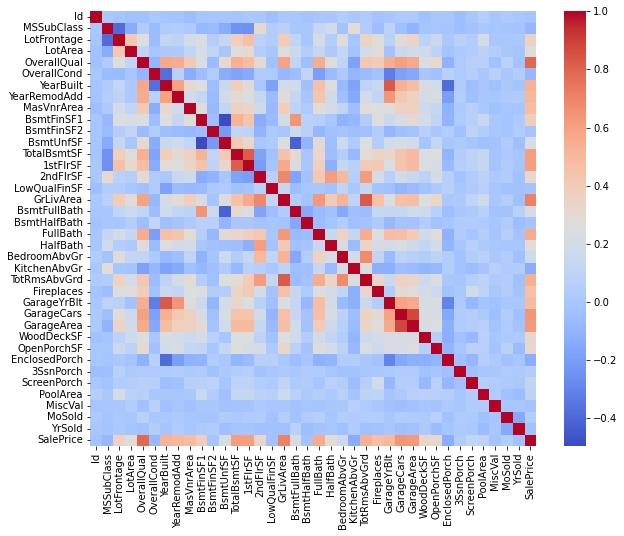

In [27]:
plot_corhmap(df)

### nahrada chybejicich hodnot prumerem:

In [28]:
def isnull_replace(df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    data_AVG_imput = df.copy()
    for col_name in get_numeric_colnames(data_AVG_imput):
        #print(col_name)
        data_AVG_imput[col_name] = data_AVG_imput[col_name].fillna(data_AVG_imput[col_name].mean())
    return data_AVG_imput

In [29]:
data_AVG_imput = isnull_replace(df)
get_nullness_and_uniqueness(data_AVG_imput,only_null=True, relative=True)

,col_names,null_counts,uniqueness
0,Alley,0.937671,0.001370
1,MasVnrType,0.597260,0.002055
2,BsmtQual,0.025342,0.002740
3,BsmtCond,0.025342,0.002740
4,BsmtExposure,0.026027,0.002740
5,BsmtFinType1,0.025342,0.004110
6,BsmtFinType2,0.026027,0.004110
7,Electrical,0.000685,0.003425
8,FireplaceQu,0.472603,0.003425
9,GarageType,0.055479,0.004110


In [30]:
get_nullness_and_uniqueness(df,only_null=True, relative=True)

,col_names,null_counts,uniqueness
0,LotFrontage,0.177397,0.075342
1,Alley,0.937671,0.001370
2,MasVnrType,0.597260,0.002055
3,MasVnrArea,0.005479,0.223973
4,BsmtQual,0.025342,0.002740
5,BsmtCond,0.025342,0.002740
6,BsmtExposure,0.026027,0.002740
7,BsmtFinType1,0.025342,0.004110
8,BsmtFinType2,0.026027,0.004110
9,Electrical,0.000685,0.003425


In [31]:
data_AVG_imput = isnull_replace(df)

### nahradit chybejici hodnoty pomoci linearni regrese:

#### vybrat hodnoty nejvice korelovane s cenou:

In [32]:
def get_most_cor_colnames_to_target(df:pd.core.frame.DataFrame, input_col_N:int, target_colname:str)->list[str]:
    input_colnames = []
    corr_col = get_cormatrix(df)[target_colname]

    # drop target:
    other_corr_col = corr_col.drop(target_colname)
    
    #absolute values:
    for i in other_corr_col.index:
        other_corr_col[i] = abs(other_corr_col[i])
    # collect highest correlated
    for col_ind in range(input_col_N):
        found_colname = other_corr_col[other_corr_col == other_corr_col.max()].index[0]
        input_colnames.append(found_colname)
        other_corr_col.drop(found_colname, inplace=True)
    return input_colnames

In [33]:
most_cor_colnames = get_most_cor_colnames_to_target(df, 2, 'LotFrontage')
most_cor_colnames

['1stFlrSF', 'LotArea']

In [34]:
def fill_nulls_lin_reg(df: pd.core.frame.DataFrame, target_colname: str, input_col_N: int) -> pd.core.frame.DataFrame:
    
    input_col_names = get_most_cor_colnames_to_target(df, input_col_N, target_colname)
    
    nulls_filled_lin_reg = df.copy()
    
    data_to_train_model_DF = df.dropna(subset=target_colname)
    
    # nafitovat lin_reg:
    model = LinearRegression().fit(data_to_train_model_DF[input_col_names], data_to_train_model_DF[target_colname])
    
    rows_with_nulls_in_target = df[df[target_colname].isnull()]
    
    # model.predict(...) vraci hodnoty na zaklade treninku:
    ##deprecated:
    ##nulls_filled_lin_reg[target_colname][nulls_filled_lin_reg[target_colname].isnull()] = model.predict(rows_with_nulls_in_target[input_col_names])
    nulls_filled_lin_reg.loc[nulls_filled_lin_reg[target_colname].isnull(), target_colname] = model.predict(rows_with_nulls_in_target[input_col_names])
    

    
    # Předpovíme chybějící hodnoty a nahradíme je v původním datasetu
    #df.loc[df[target_column].isnull(), target_column] = model.predict(missing_data[feature_columns])
    
    
    
    return nulls_filled_lin_reg
    
    

In [35]:
filled_with_lin_reg = fill_nulls_lin_reg(df,'LotFrontage', 3)

# nalezeni odlehlych hodnot:

In [36]:
from scipy import stats

In [37]:
# souvisi s rozdelenim:

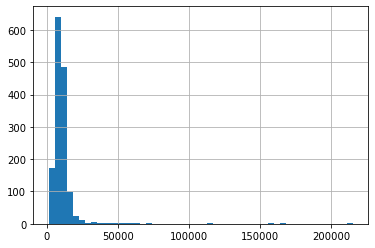

In [38]:
df['LotArea'].hist(bins=50)

plt.show()


In [39]:
def get_outliers(df, colname: str, threshold: float ) -> pd.core.frame.DataFrame:
    data = df.copy()
    data['zscore'] = stats.zscore(data[colname])
    return data[abs(data['zscore']) > threshold]

In [40]:
get_outliers(filled_with_lin_reg, 'LotFrontage', 3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,zscore
171,172,20,RL,141.000000,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,...,528,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,3.003832
197,198,75,RL,174.000000,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,...,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000,4.412793
231,232,60,RL,174.000000,15138,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1995,...,810,TA,TA,Y,0,146,202,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,403000,4.412793
249,250,50,RL,209.573932,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,...,389,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000,5.931650
313,314,20,RL,150.000000,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,...,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000,3.388094
335,336,190,RL,214.868296,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,...,529,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950,6.157697
706,707,20,RL,175.411009,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,...,739,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000,4.473037
807,808,70,RL,144.000000,21384,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,2Story,5,6,1923,...,528,TA,TA,Y,0,312,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,223500,3.131920
909,910,60,RL,149.000000,12589,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2005,...,390,TA,TA,Y,36,24,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,174000,3.345399
934,935,20,RL,313.000000,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,...,505,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000,10.347506


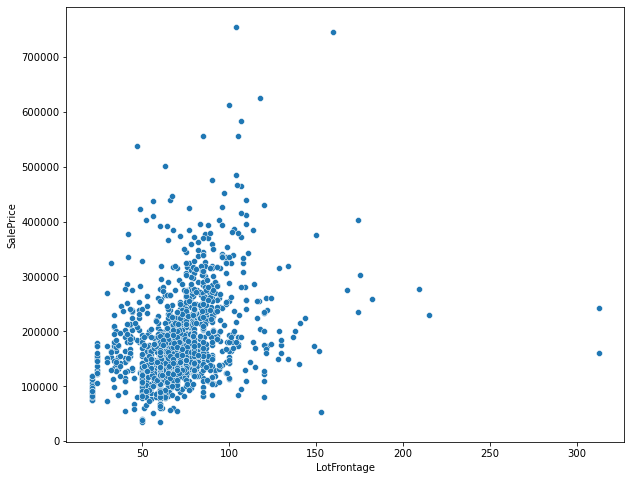

In [41]:
plt.figure(figsize=FIG_SIZE)
sns.scatterplot(filled_with_lin_reg, x="LotFrontage", y="SalePrice")
plt.show()

In [42]:
get_outliers(filled_with_lin_reg, 'LotFrontage', 2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,zscore
75,76,180,RM,21.000000,1596,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SLvl,4,5,1973,...,297,TA,TA,Y,120,101,0,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Normal,91000,-2.119661
85,86,60,RL,121.000000,16059,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1991,...,462,TA,TA,Y,127,82,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,260000,2.149917
86,87,60,RL,122.000000,11911,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2005,...,400,TA,TA,Y,100,38,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,174000,2.192613
150,151,20,RL,120.000000,10356,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,...,440,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000,2.107221
159,160,60,RL,134.000000,19378,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2005,...,576,TA,TA,Y,239,132,0,168,0,0,NaN,NaN,NaN,0,3,2006,New,Partial,320000,2.704962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,1360,20,RL,129.000000,16737,Pave,NaN,Reg,Lvl,AllPub,FR3,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2004,...,770,TA,TA,Y,194,45,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal,315000,2.491483
1361,1362,20,RL,124.000000,16158,Pave,NaN,IR1,Low,AllPub,Inside,Mod,StoneBr,Norm,Norm,1Fam,1Story,7,5,2005,...,430,TA,TA,Y,168,36,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,260000,2.278004
1378,1379,160,RM,21.000000,1953,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1973,...,264,TA,TA,Y,72,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,83000,-2.119661
1396,1397,20,RL,121.519964,57200,Pave,NaN,IR1,Bnk,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,5,5,1948,...,572,TA,TA,N,0,0,50,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000,2.172117


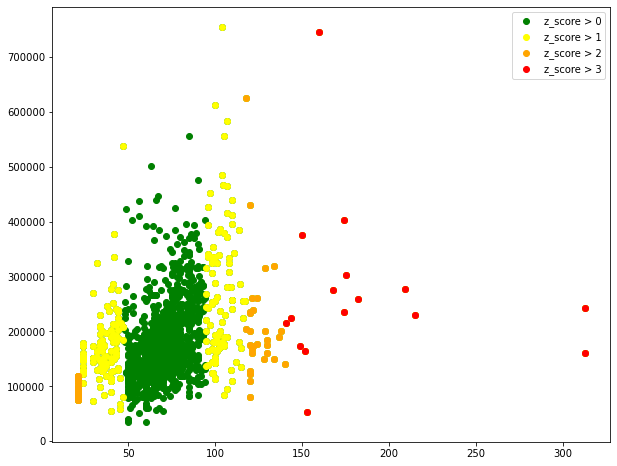

In [43]:
plt.figure(figsize=FIG_SIZE)
colors = ["green","yellow","orange","red"]
for i, color in enumerate(colors):
    #print(f"{i} {color}")
    curr_outliers_DF = get_outliers(filled_with_lin_reg, 'LotFrontage', i)
    
    plt.scatter(curr_outliers_DF["LotFrontage"], curr_outliers_DF["SalePrice"], color=color, label = f"z_score > {i}")

plt.legend()
plt.show()

In [44]:
most_cor_colnames = get_most_cor_colnames_to_target(df, 5, 'SalePrice')

## jiny zpusob, jak se divat na outliery:

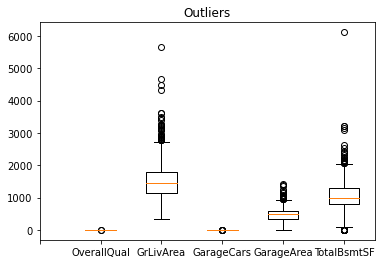

In [45]:
plt.boxplot(df[most_cor_colnames])
plt.title("Outliers")
plt.xticks(ticks=list(range(len(most_cor_colnames)+1)) ,labels=[""]+most_cor_colnames)
plt.show()

# asi je videt, ze neni nic videt -- musime to preskalovat !!!

## Preskalovani:

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
re_scaled = df.copy()
scaler = StandardScaler()
re_scaled[most_cor_colnames] = scaler.fit_transform(df[most_cor_colnames])

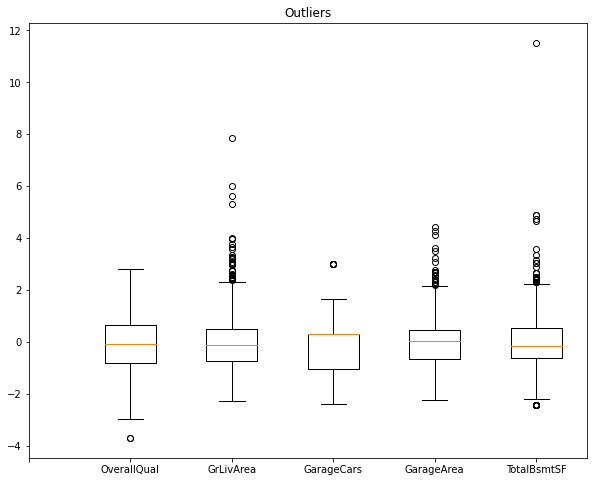

In [48]:
plt.figure(figsize=FIG_SIZE)
plt.boxplot(re_scaled[most_cor_colnames])
plt.title("Outliers")
plt.xticks(ticks=list(range(len(most_cor_colnames)+1)) ,labels=[""]+most_cor_colnames)
plt.show()

# One-Hot encoding

In [49]:
def one_hot_encode(df, colnames: list[str]) -> pd.core.frame.DataFrame: 
    return pd.get_dummies(df, columns=colnames)

In [50]:
one_hot_encode(df, ["Street","LandContour"])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,1,60,RL,65.0,8450,NaN,Reg,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,...,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,False,True,False,False,False,True
1,2,20,RL,80.0,9600,NaN,Reg,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,...,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,False,True,False,False,False,True
2,3,60,RL,68.0,11250,NaN,IR1,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,...,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,False,True,False,False,False,True
3,4,70,RL,60.0,9550,NaN,IR1,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,...,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,False,True,False,False,False,True
4,5,60,RL,84.0,14260,NaN,IR1,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,...,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,NaN,Reg,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,...,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,False,True,False,False,False,True
1456,1457,20,RL,85.0,13175,NaN,Reg,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,...,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,False,True,False,False,False,True
1457,1458,70,RL,66.0,9042,NaN,Reg,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,...,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,False,True,False,False,False,True
1458,1459,20,RL,68.0,9717,NaN,Reg,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,...,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,False,True,False,False,False,True


# OTAZKY na patek:

In [51]:
#?????????
### Jakej je rozdil:

def get_numeric_colnames(df: pd.core.frame.DataFrame) -> list:
    """returns a list of column names that contain numeric values"""
    return [col_name for col_name in df.select_dtypes(include=np.number).columns]

#VERSUS:

def get_numeric_colnames(df: pd.core.frame.DataFrame) -> list:
    """returns a list of column names that contain numeric values"""
    return [col_name for col_name in df.select_dtypes(include=np.number)]

#?????????

### rozdil neni zadnej, protoze nahodou pd.core.frame.DataFrame ma nastaveny iterator pres colnames